
# <span style="color:rgb(213,80,0)">Investment Funds data.</span>

This file creates Figures 6.8-6.13 and Table 6.1.

## Beginning of code

In [1]:
FondiInv=load('fondi_large.txt');

y=FondiInv(:,2);
X=FondiInv(:,[1 3]);
n=length(y);
prin=0;

## Create Figure 6.8

yXplot


In [2]:
booneg=y<0;
seq=1:length(y);
group=ones(length(y),1);
group(seq(booneg))=2;

yXplot(y,X,'group',group)

ans = 
ans(:,:,1) =
    0.0010    1.0010
ans(:,:,2) =
     0     0


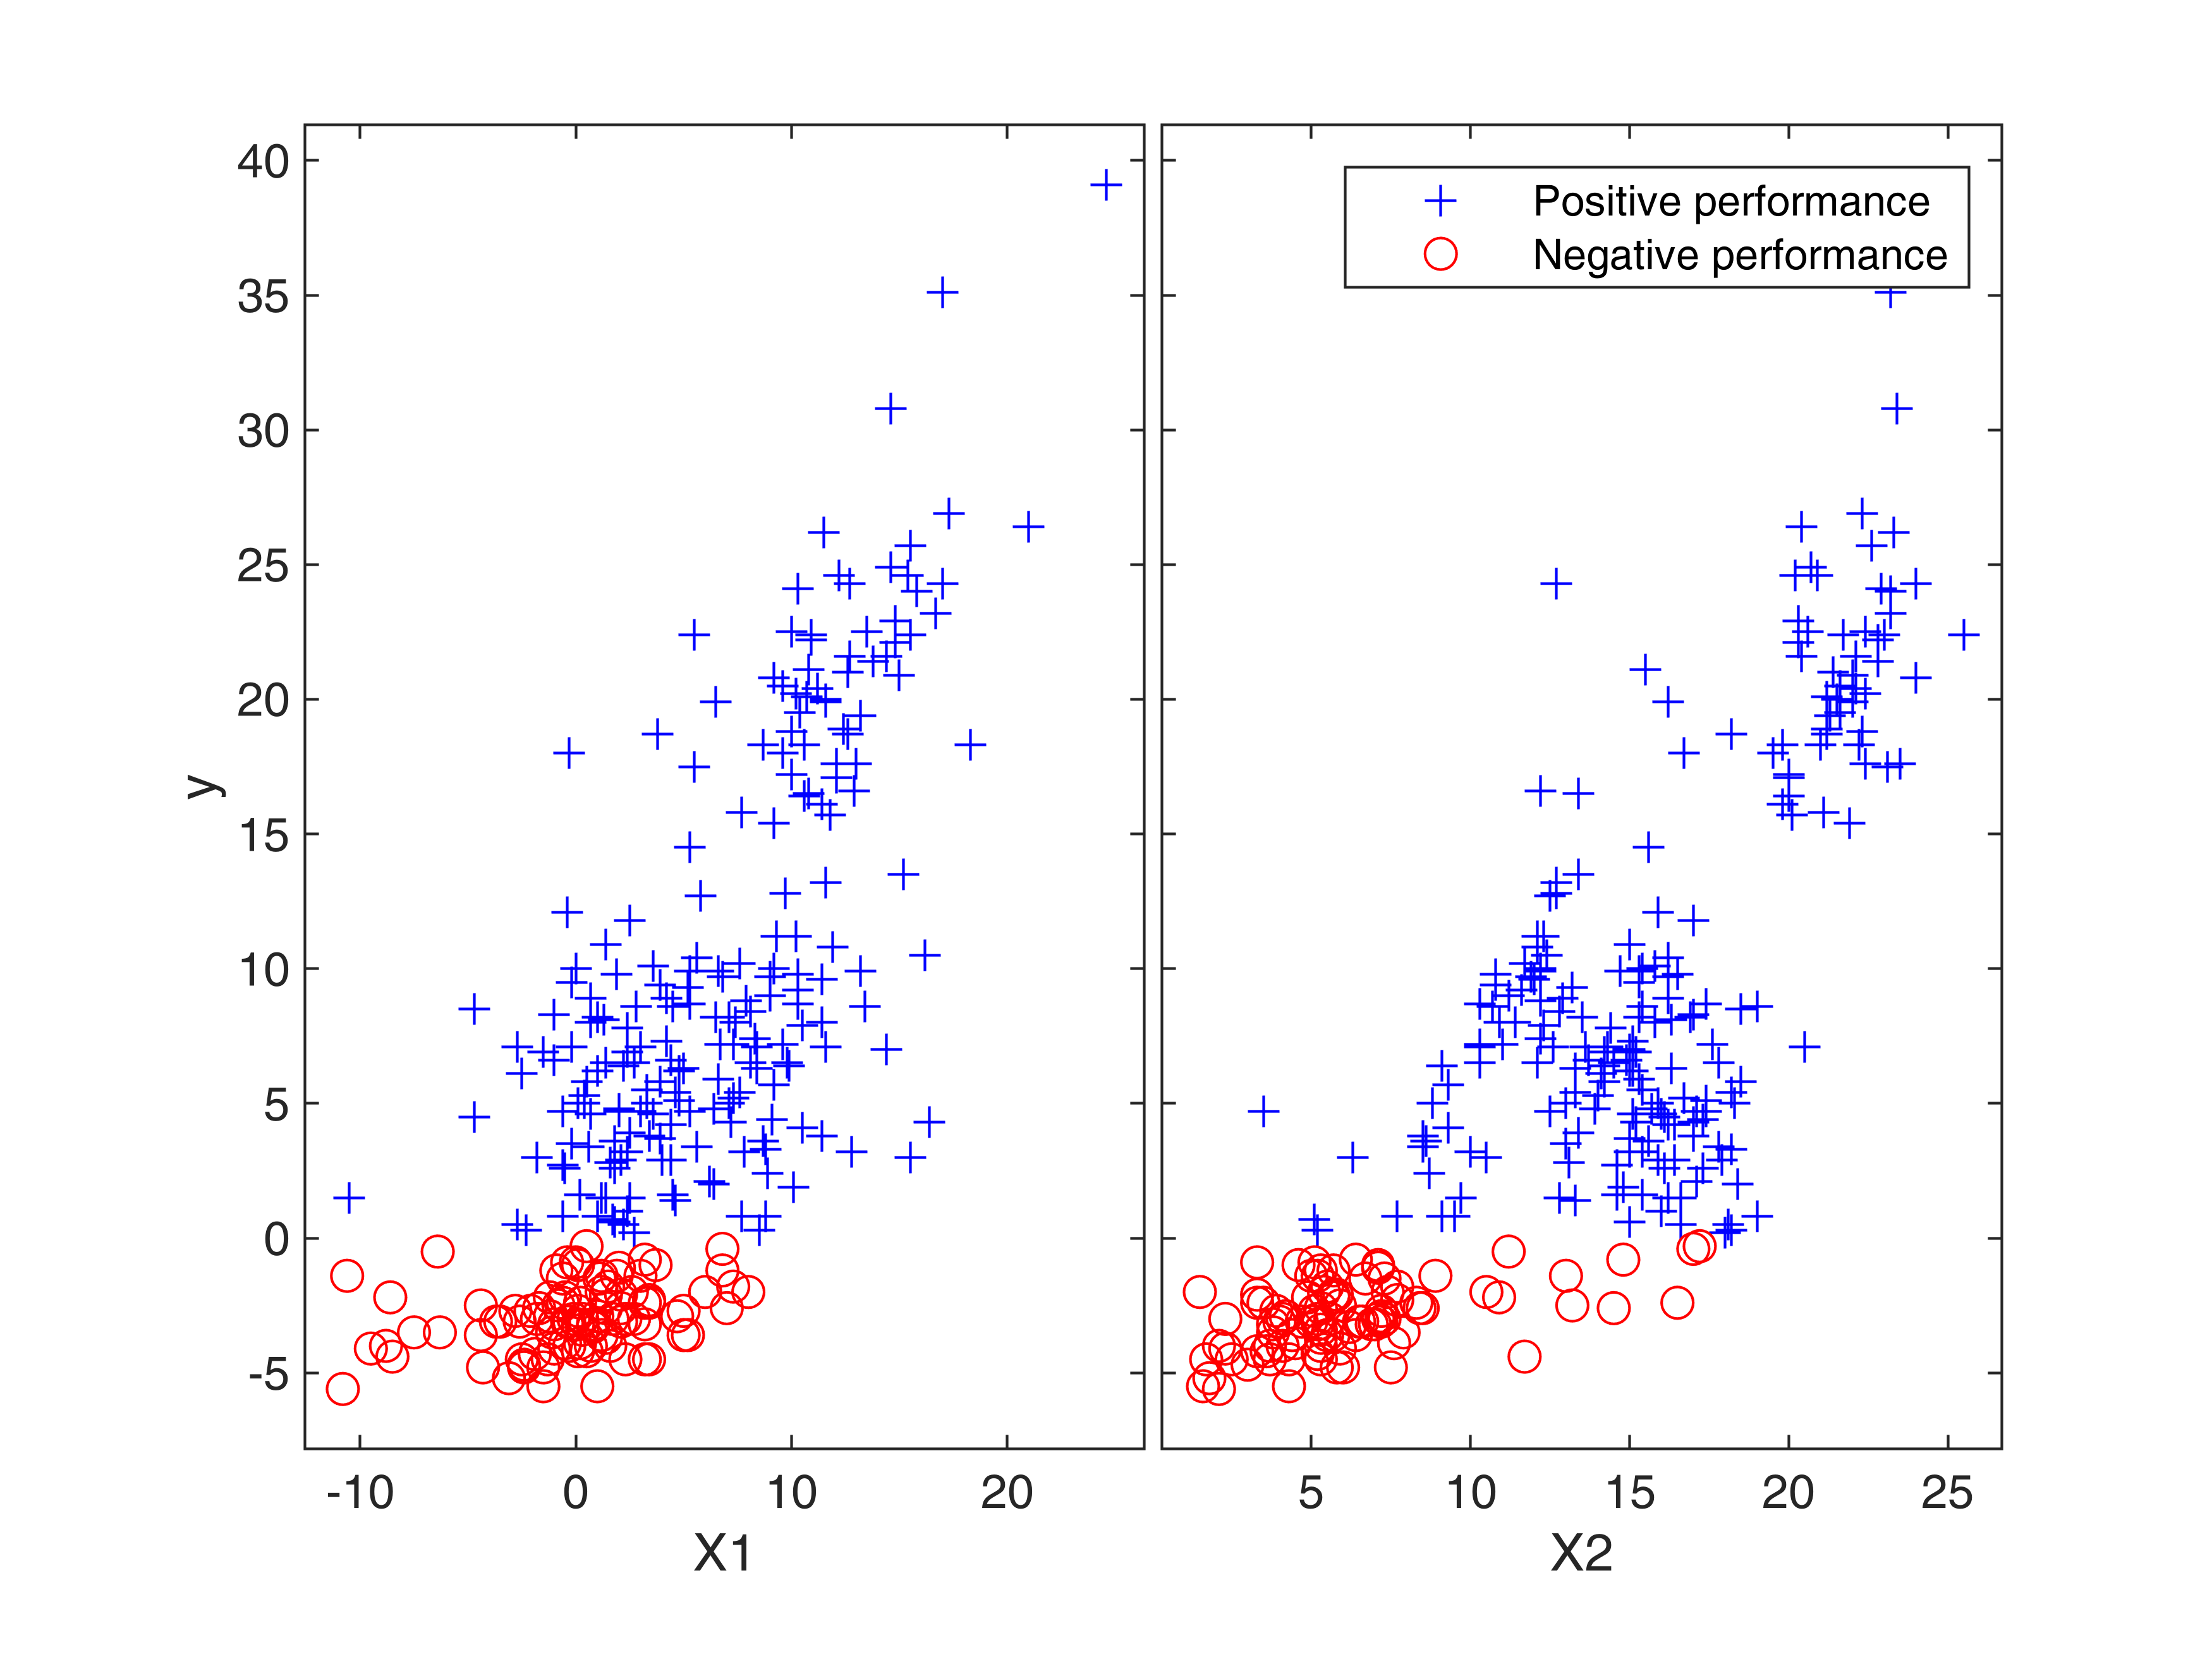

In [3]:
legend({'Positive performance' 'Negative performance'})

In [4]:

disp('fit on the original scale')

fit on the original scale

In [5]:
mldlN1=fitlm(X,y,'exclude','');

% Store F and R2adj
% Store quantities for Table 6.1
StoreFandR2lN1=[mldlN1.ModelFitVsNullModel.Fstat;  mldlN1.Rsquared.Adjusted];

## Create Figure 6.9

Create top panel of Figure 6.9


Total estimated time to complete LMS:  0.07 seconds 
Total estimated time to complete LMS:  0.01 seconds 
Total estimated time to complete LMS:  0.01 seconds 
Total estimated time to complete LMS:  0.01 seconds 
Total estimated time to complete LMS:  0.01 seconds 
Total estimated time to complete LMS:  0.01 seconds


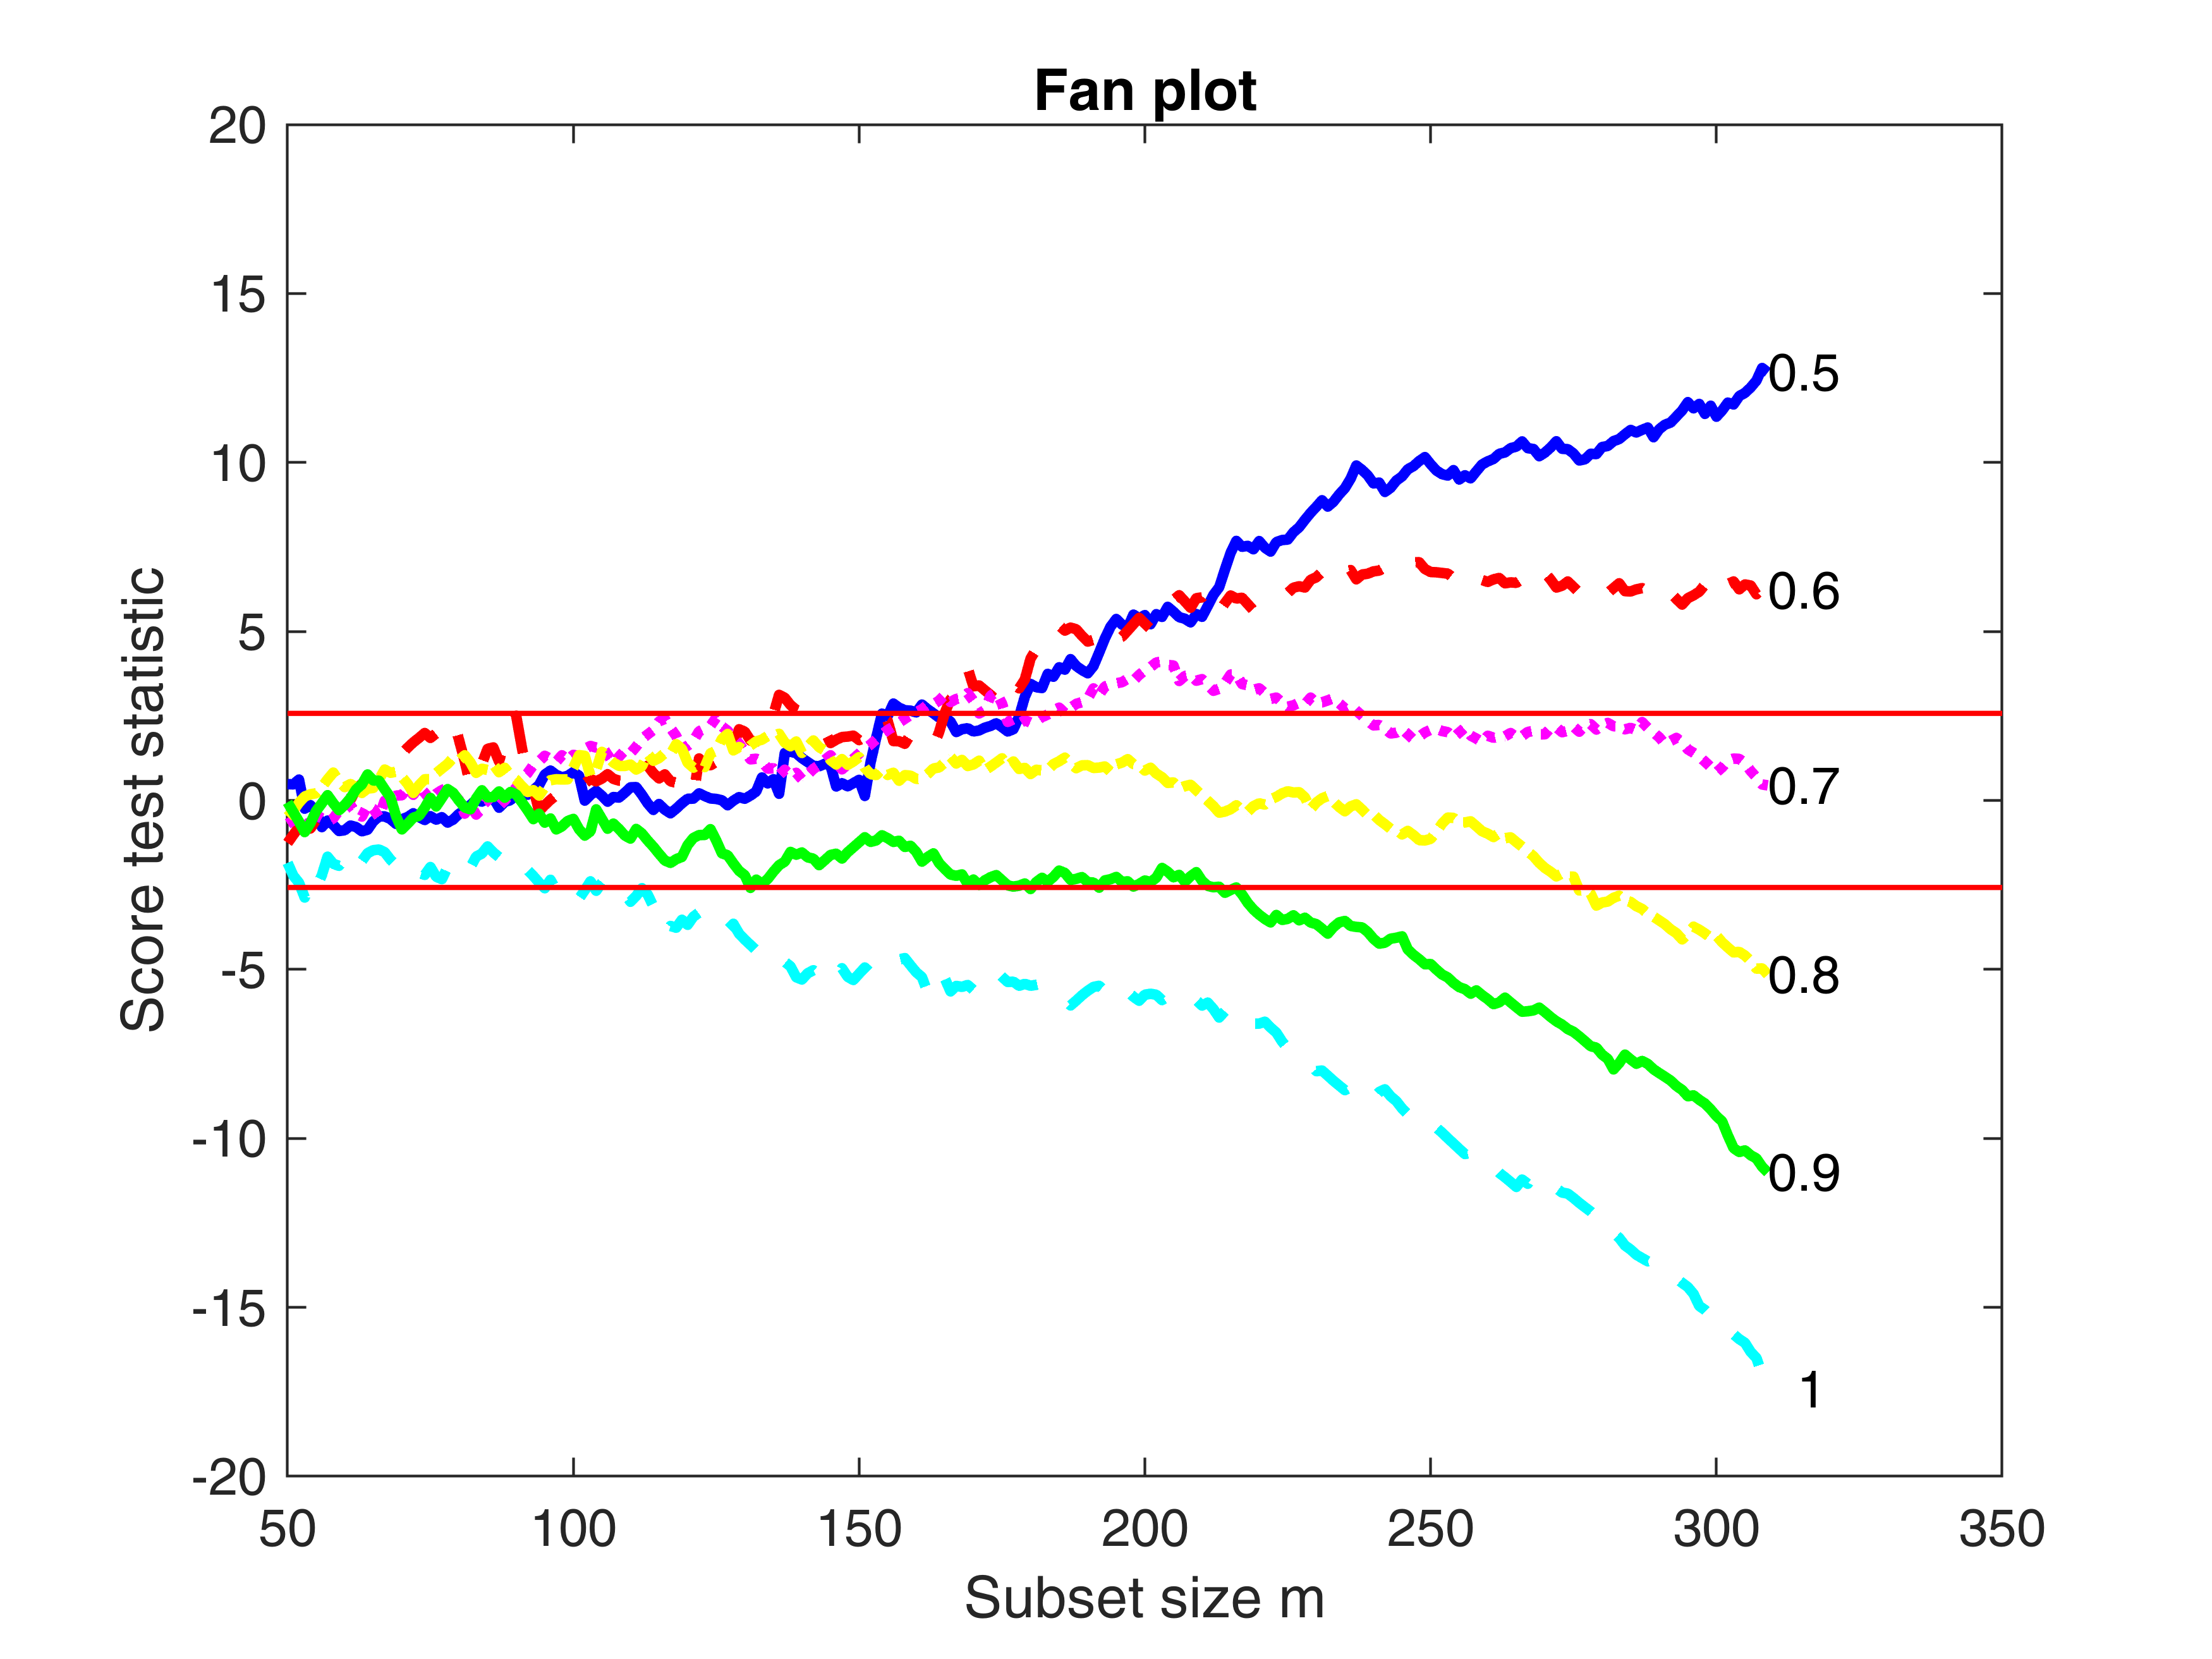

In [6]:
ylimy=20;
nini=100;
la=[0.5 0.6 0.7 0.8 0.9 1];
out=FSRfan(y,X,'la',la,'family','YJ','plots',1,'init',round(nini/2),'ylimy',[-ylimy ylimy],'tag','ori');

Total estimated time to complete LMS:  0.01 seconds


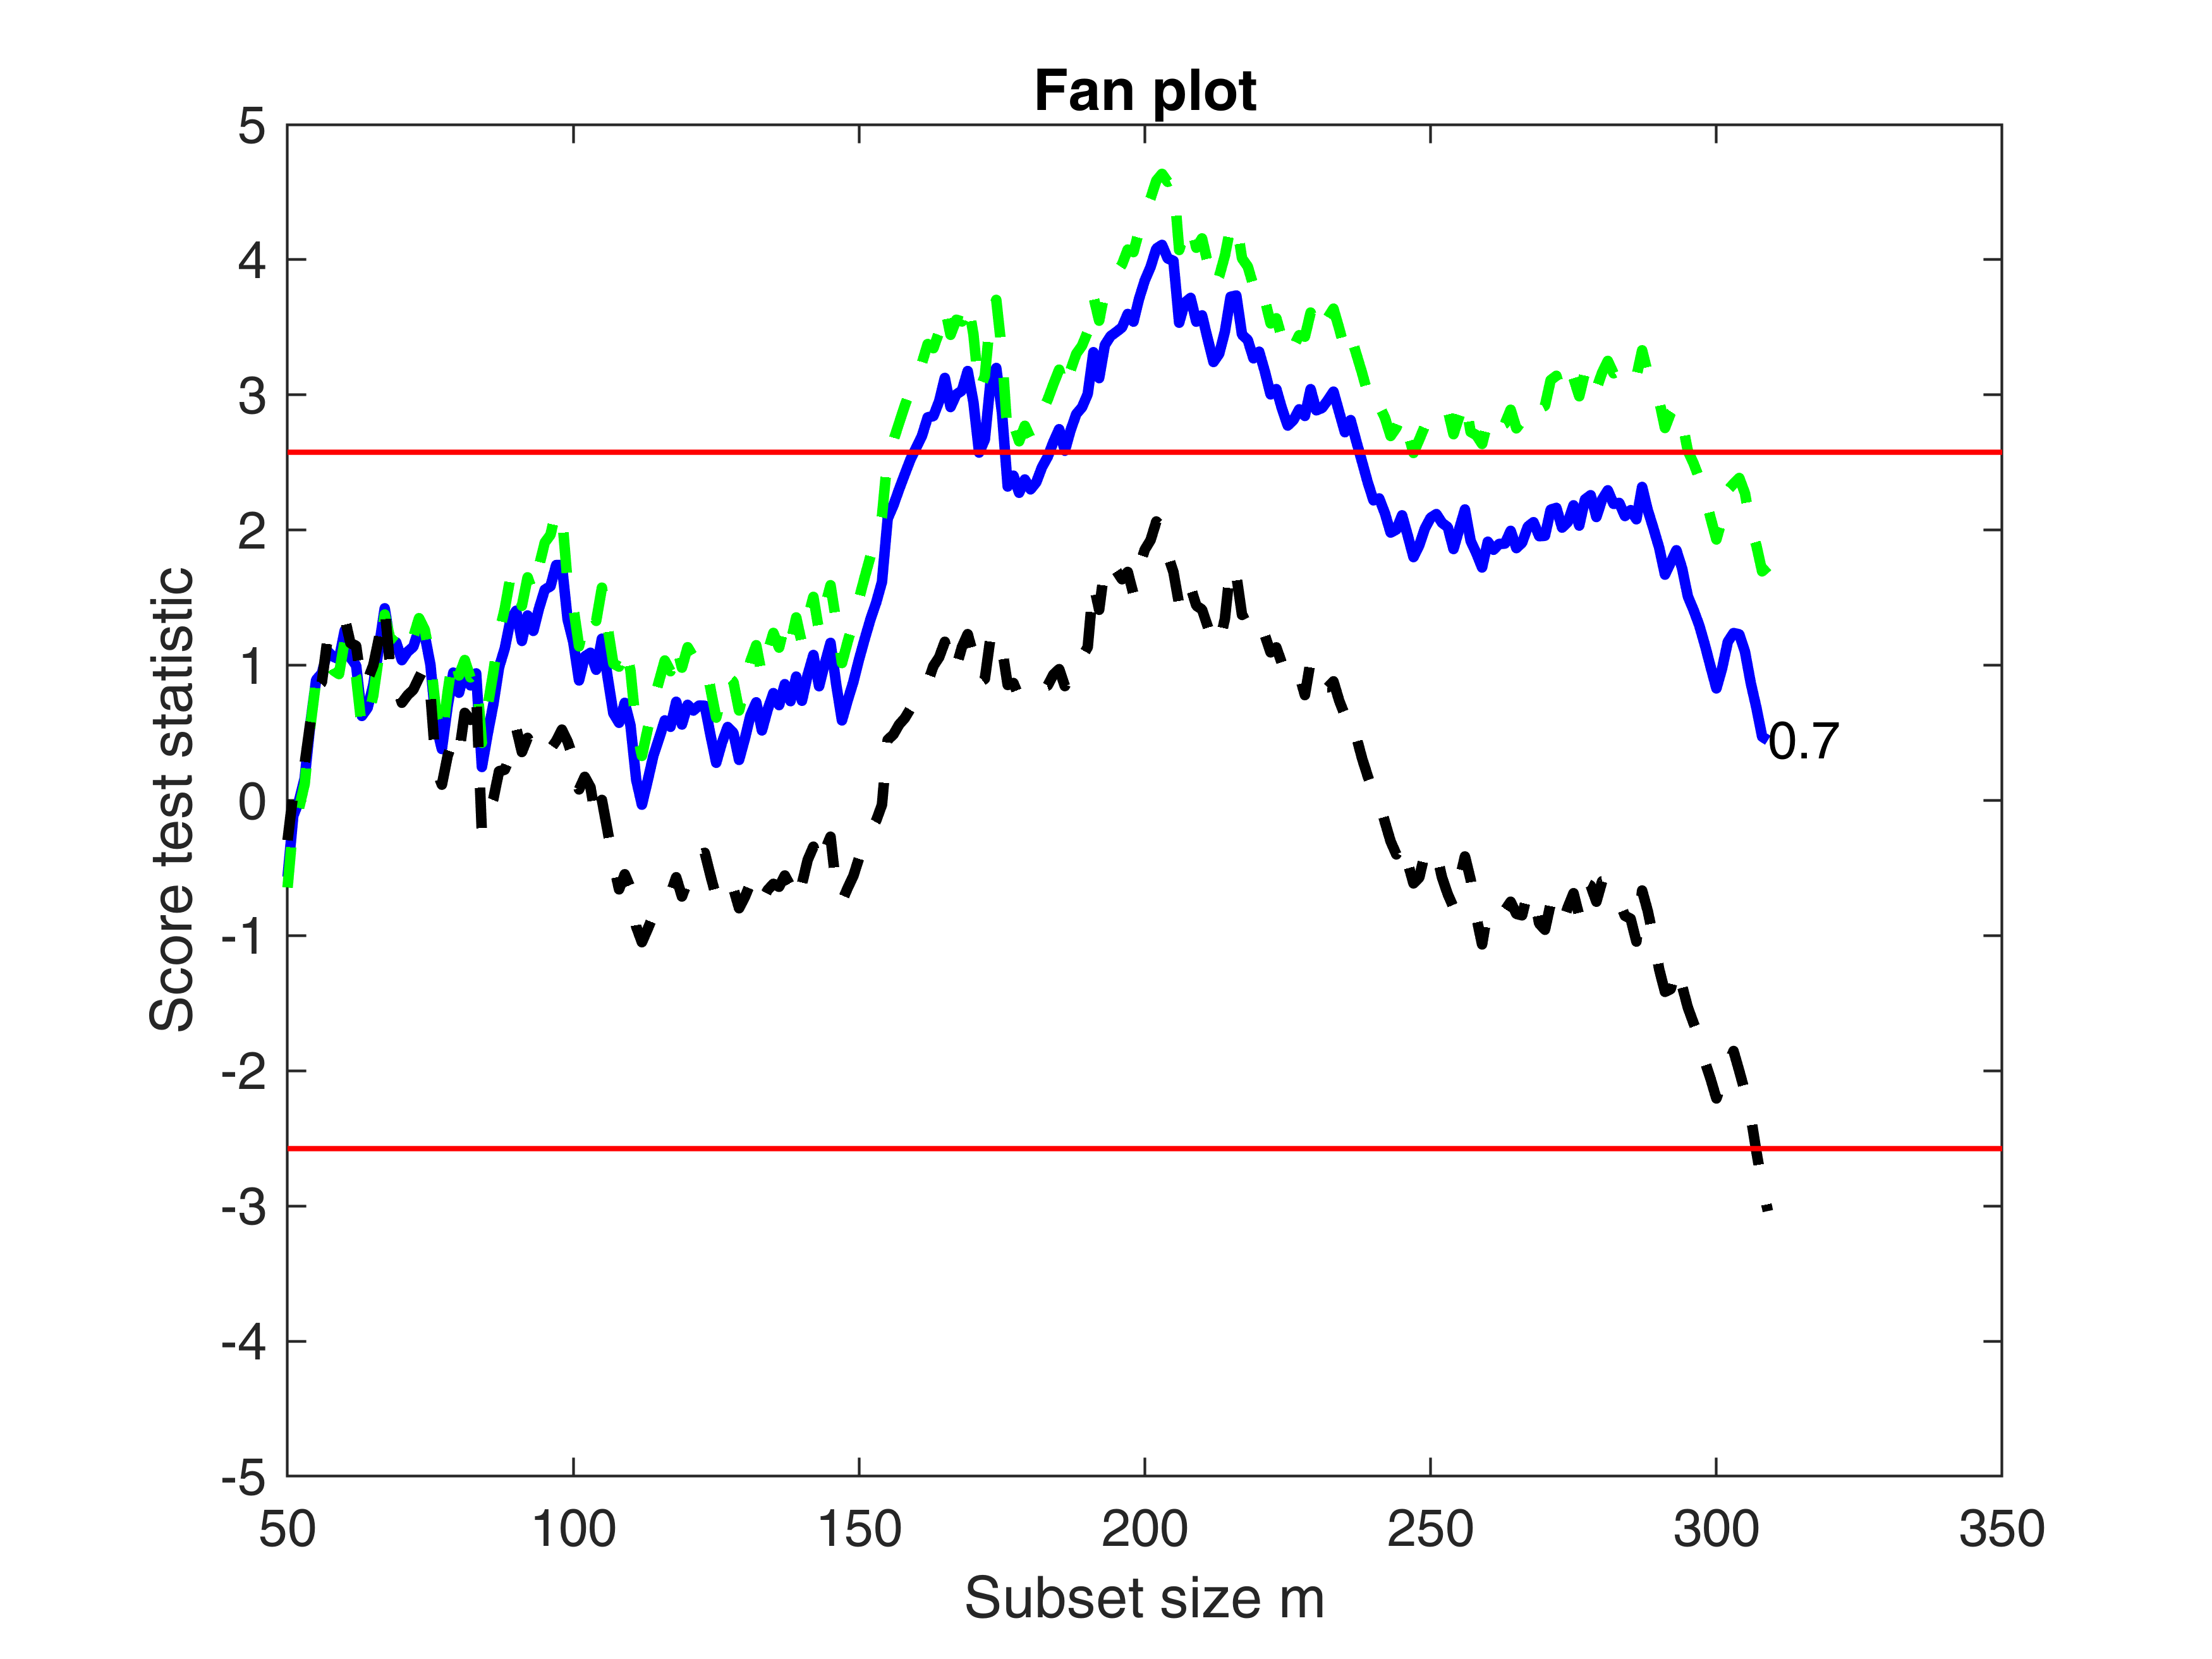

In [7]:

% Create bottom panel of Figure 6.9
% pos and neg for 0.7
lasel=0.7;
ylimy1=5;
outpn=FSRfan(y,X,'la',lasel,'family','YJpn','plots',1,'init',round(nini/2),'ylimy',[-ylimy1 ylimy1]);

In [8]:

if prin==1
    % print to postscript
     print -depsc figsFondi\fanplotoriA.eps;
     print -depsc figsFondi\fanplotoriB.eps;
end

## Create Figure 6.10

Extended fanplot for lambda_P=1 and lambda_n=0.5, 0.25 and 0.0


In [9]:
m0=round(nini/2);
ylimy=[-10 4];
xlimx=[50 n];
FontSizeylabel=12;
% (top panel)
yTOP=normYJpn(y, [], [1, 0.5], 'inverse',false, 'Jacobian', false);
outpnTOP=FSRfan(yTOP,X,'la',1,'family','YJpn','plots',1,'init',m0, ...
    'tag','pltop','xlimx',xlimx,'ylimy',ylimy);

Total estimated time to complete LMS:  0.01 seconds


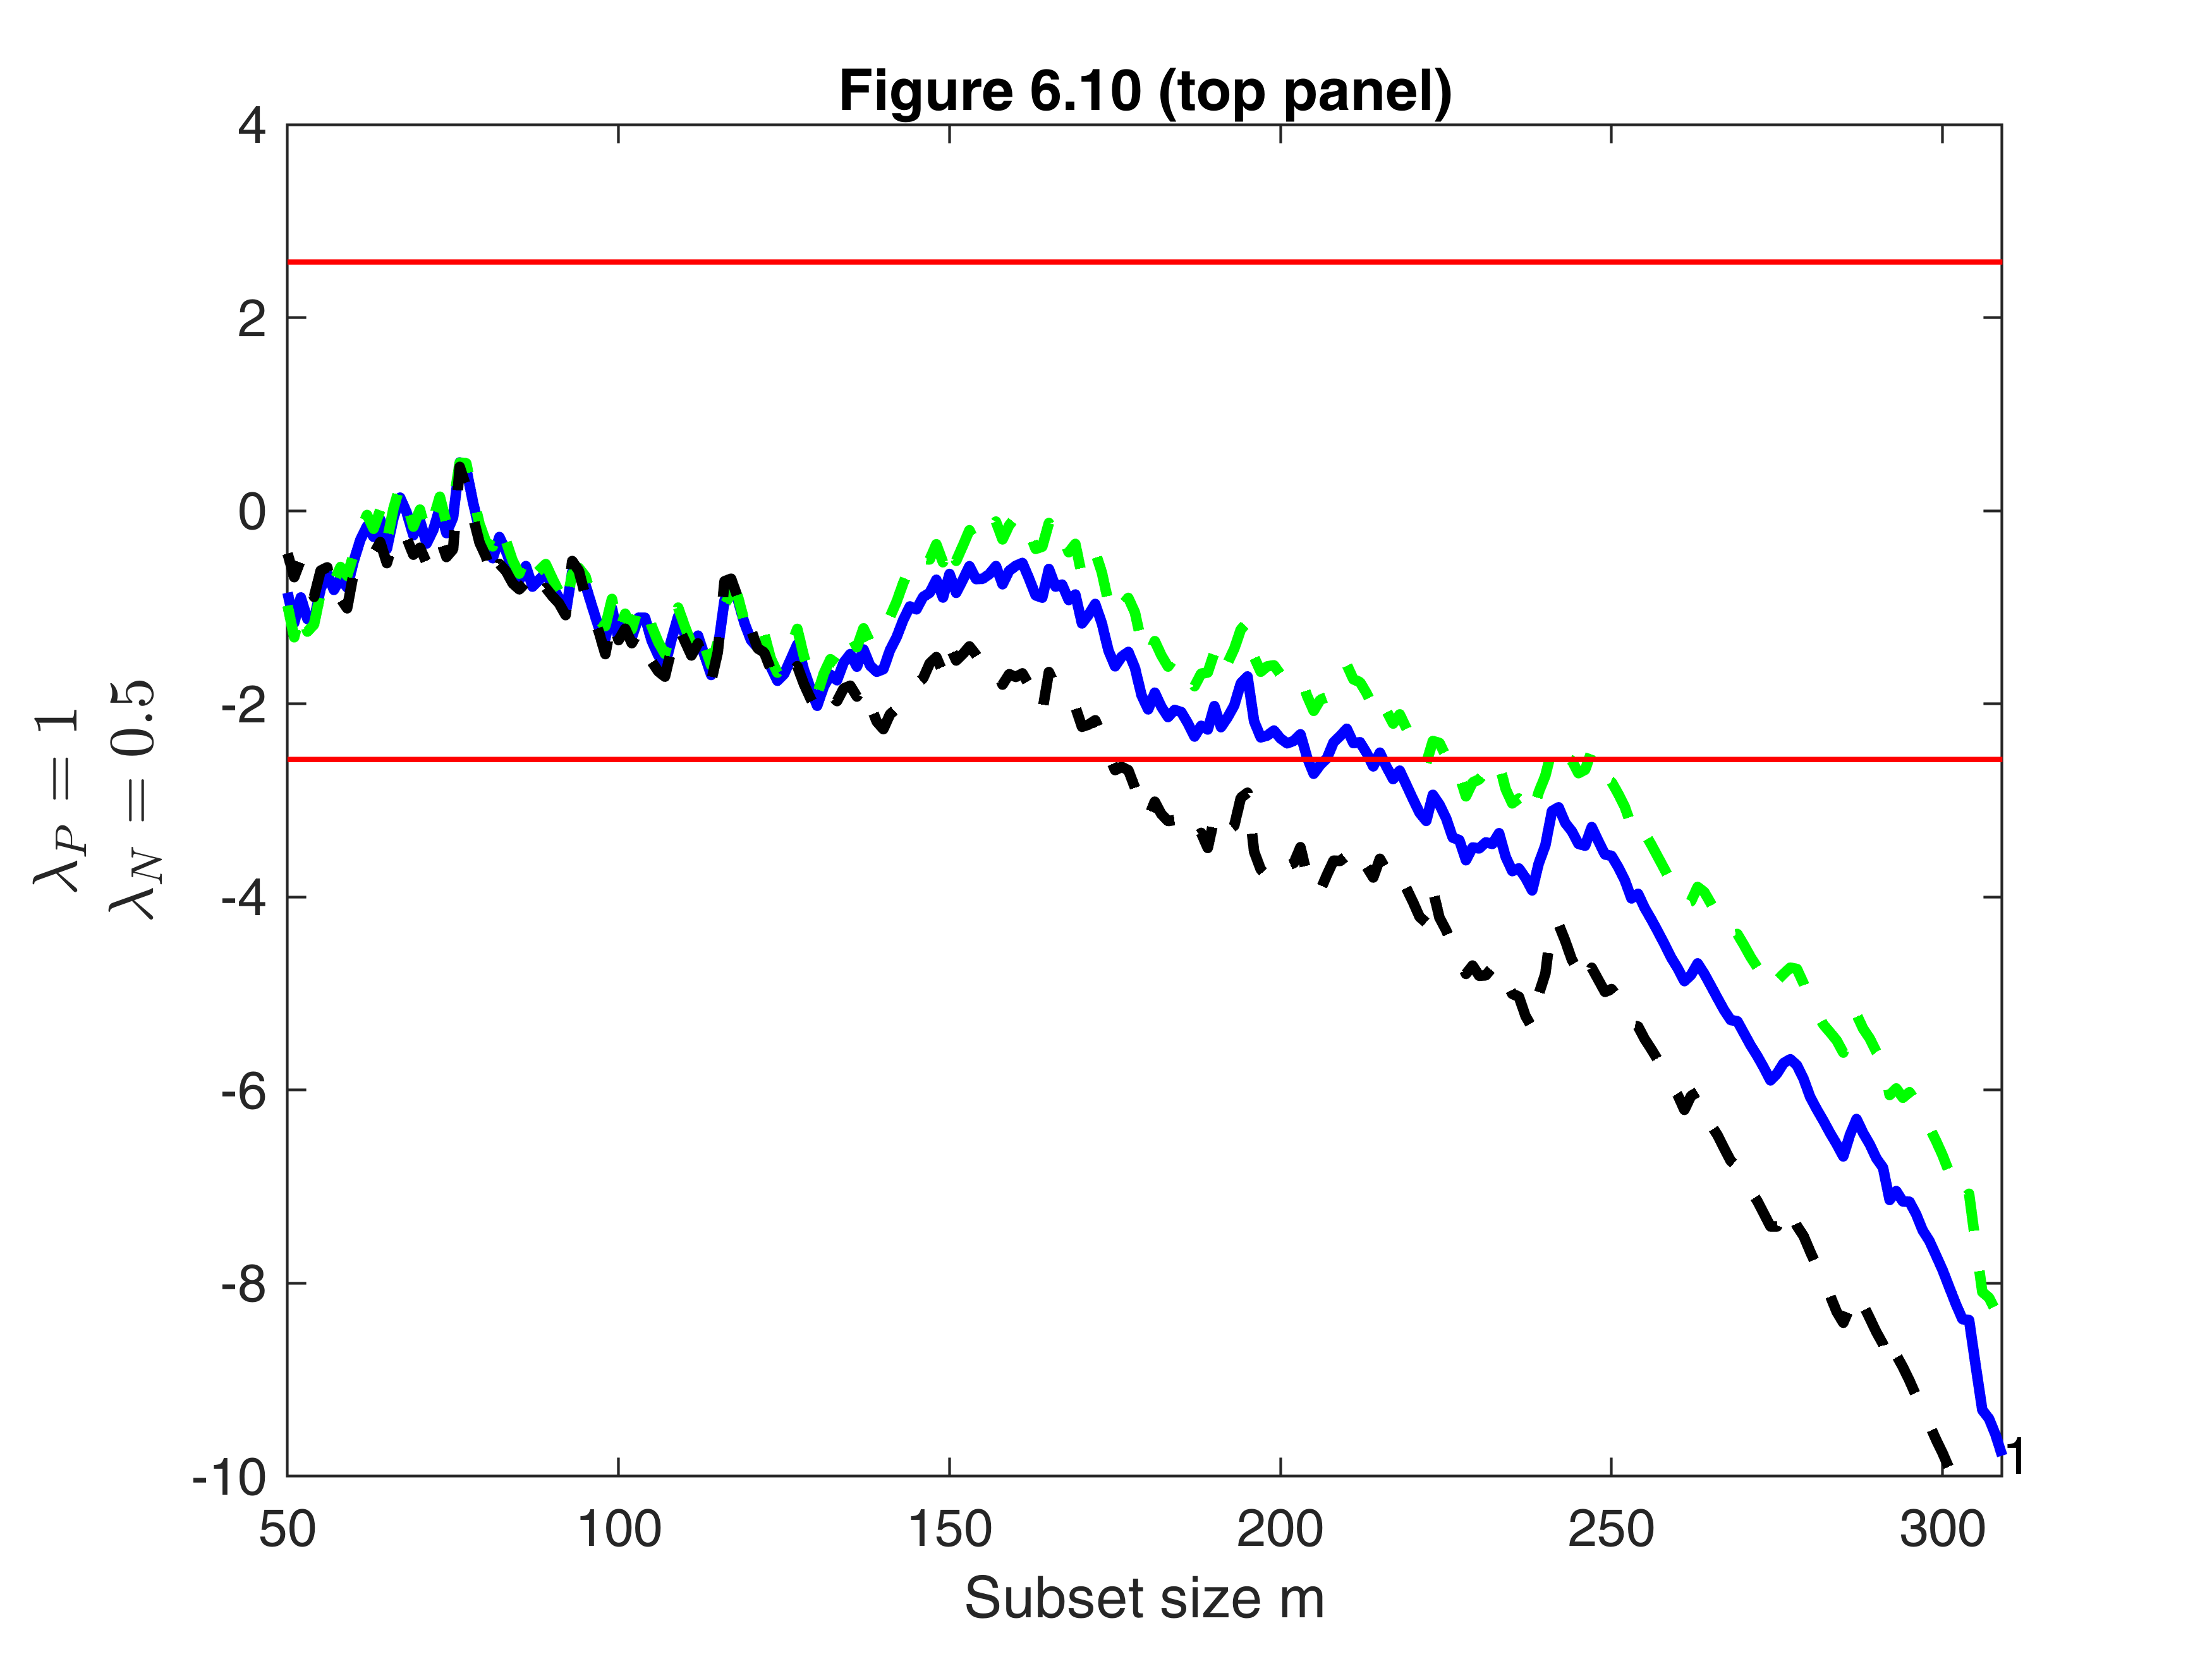

In [10]:
ylabel({' !!!EQ_1!!! ',' !!!EQ_2!!! '},'Interpreter','latex','FontSize',FontSizeylabel);
title('Figure 6.10 (top panel)')
set(gcf,"Name",'Figure 6.10 (top panel)')

In [11]:

% Store F and R2adj
% Store quantities for Table 6.1
mldlN05=fitlm(X,yTOP,'exclude','');
StoreFandR2lN05=[mldlN05.ModelFitVsNullModel.Fstat;  mldlN05.Rsquared.Adjusted];

% (middle panel)
yMID=normYJpn(y, [], [1, 0.25], 'inverse',false, 'Jacobian', false);
outpnMID=FSRfan(yMID,X,'la',1,'family','YJpn','plots',1,'init',m0, ...
    'tag','plmid','xlimx',xlimx,'ylimy',ylimy);

Total estimated time to complete LMS:  0.01 seconds


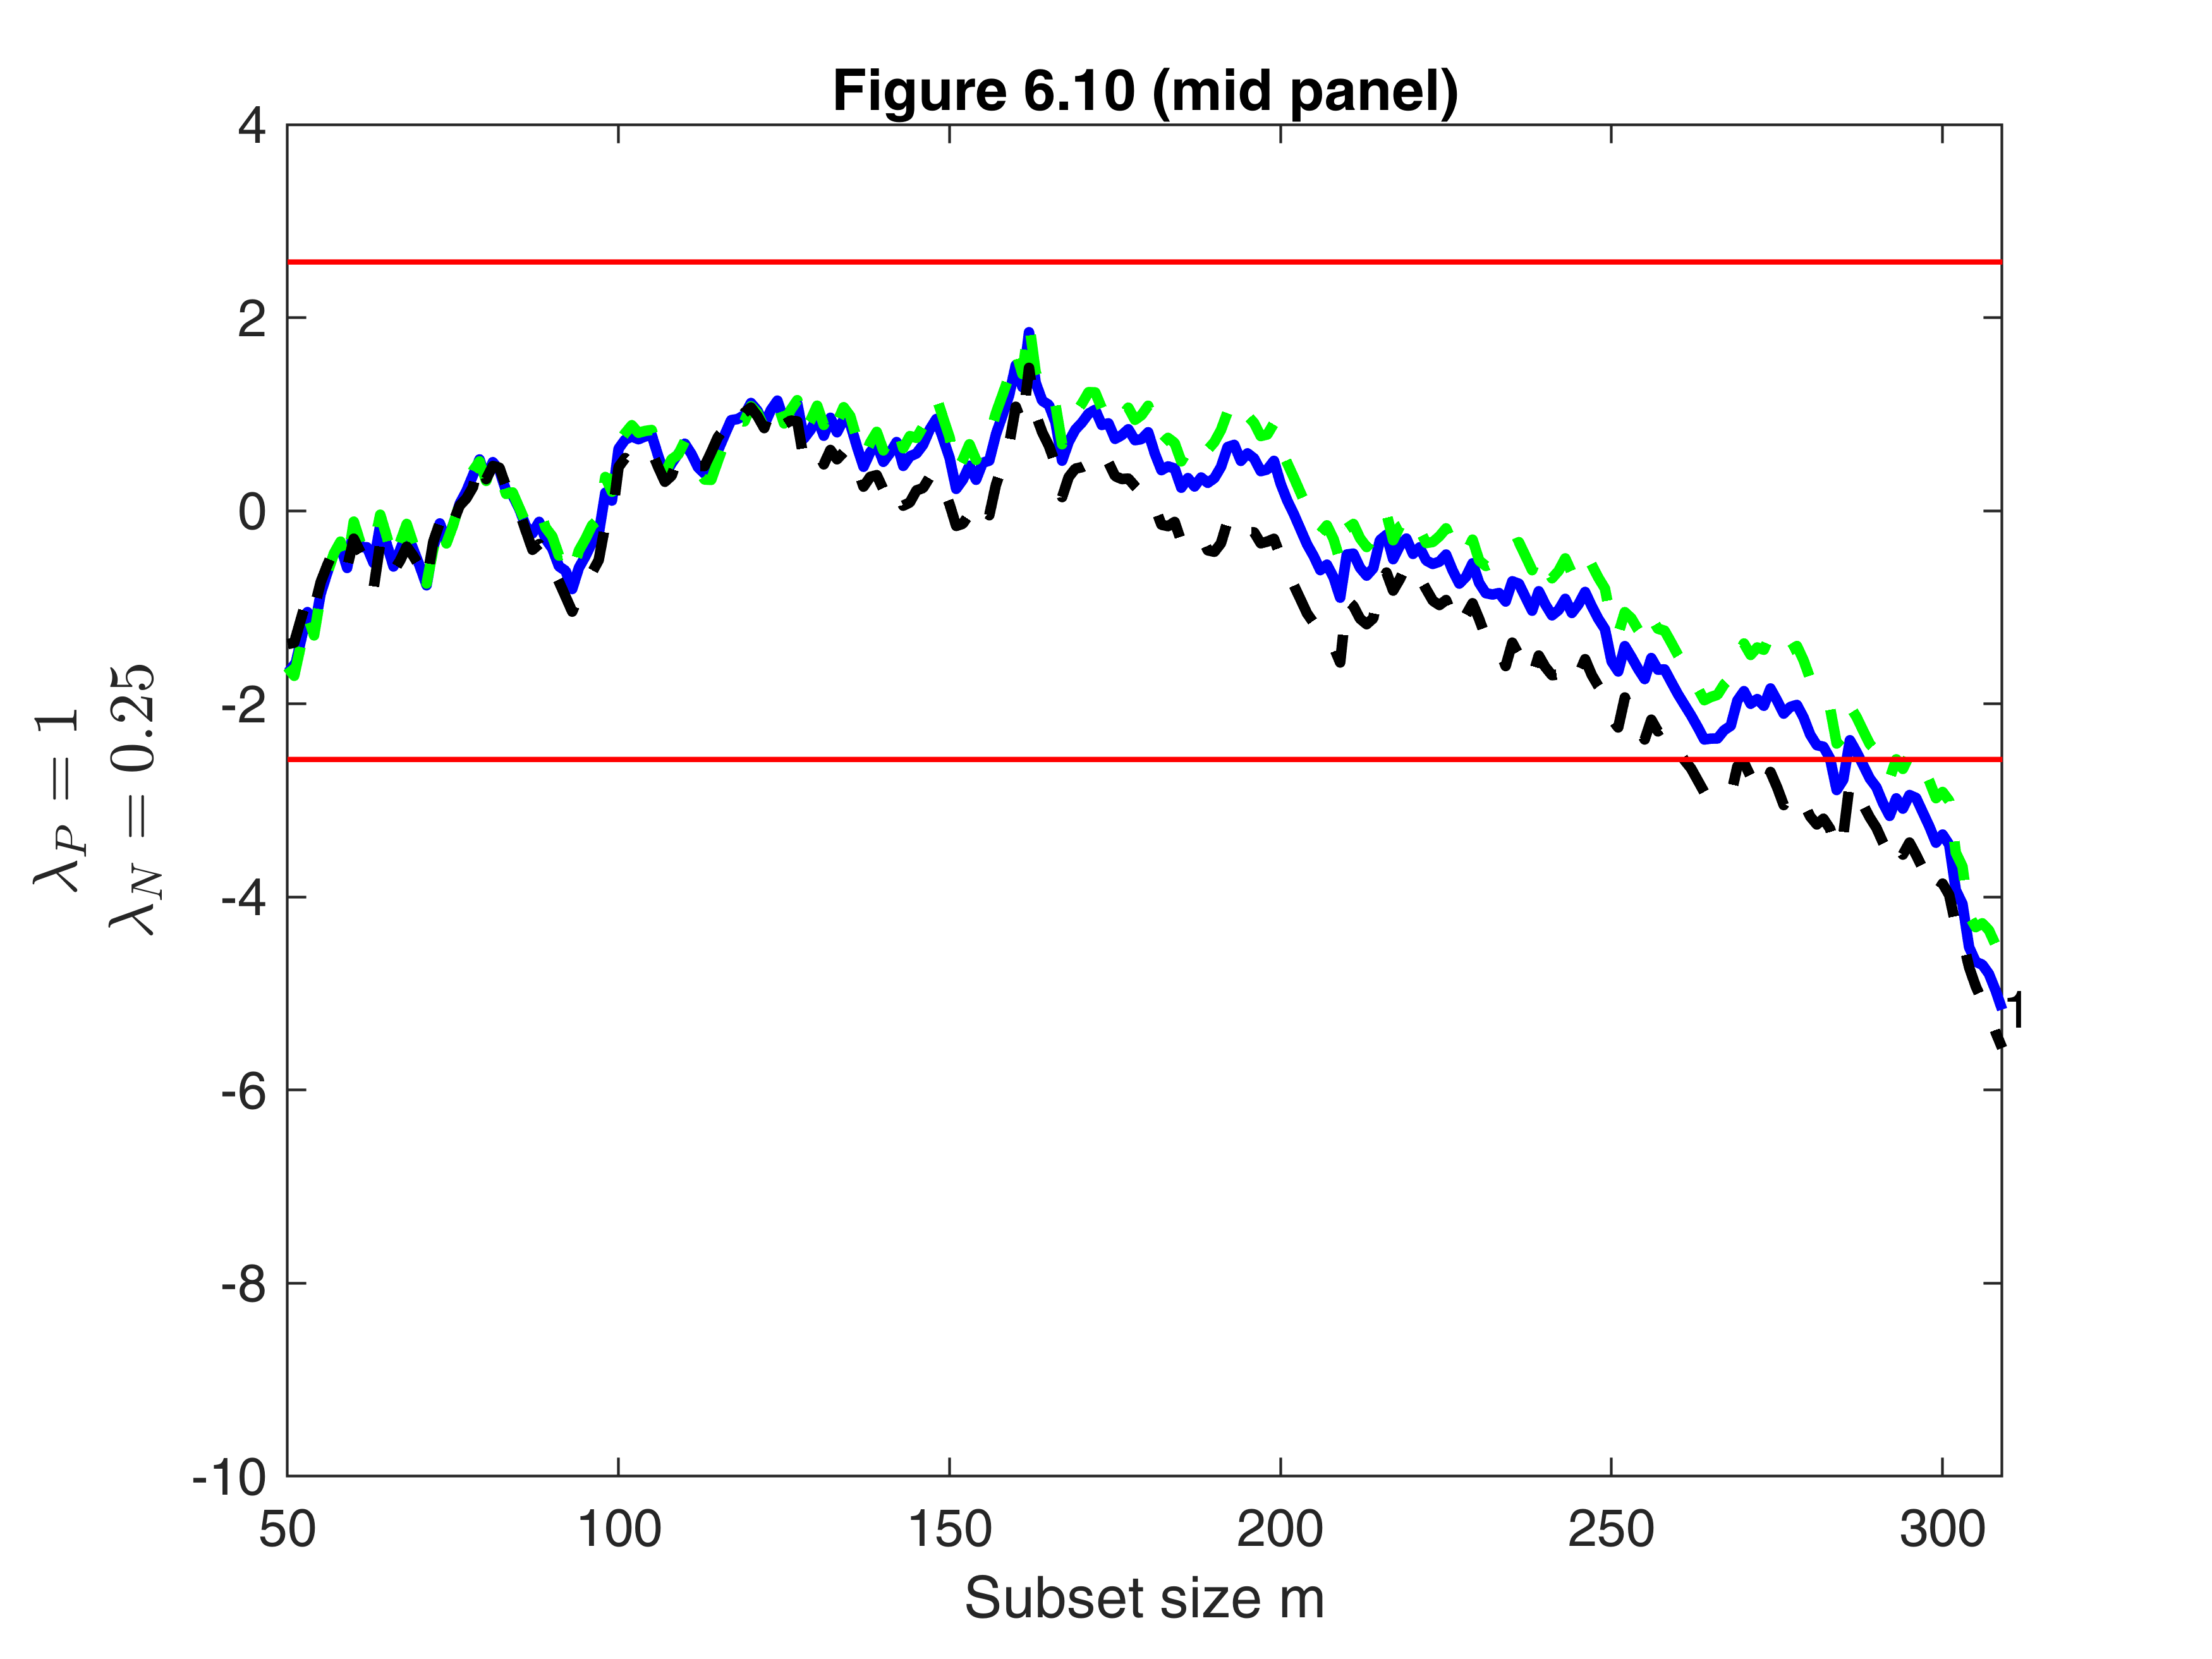

In [12]:
ylabel({' !!!EQ_1!!! ',' !!!EQ_4!!! '},'Interpreter','latex','FontSize',FontSizeylabel);
title('Figure 6.10 (mid panel)')
set(gcf,"Name",'Figure 6.10 (mid panel)')

In [13]:
% Store F and R2adj
% Store quantities for Table 6.1
mldlN025=fitlm(X,yMID,'exclude','');
StoreFandR2lN025=[mldlN025.ModelFitVsNullModel.Fstat;  mldlN025.Rsquared.Adjusted];

% (bottom panel)
yBOT=normYJpn(y, [], [1, 0.0], 'inverse',false, 'Jacobian', false);
outpnBOT=FSRfan(yBOT,X,'la',1,'family','YJpn','plots',1,'init',m0, ...
    'tag','plbottom','xlimx',xlimx,'ylimy',ylimy);

Total estimated time to complete LMS:  0.01 seconds


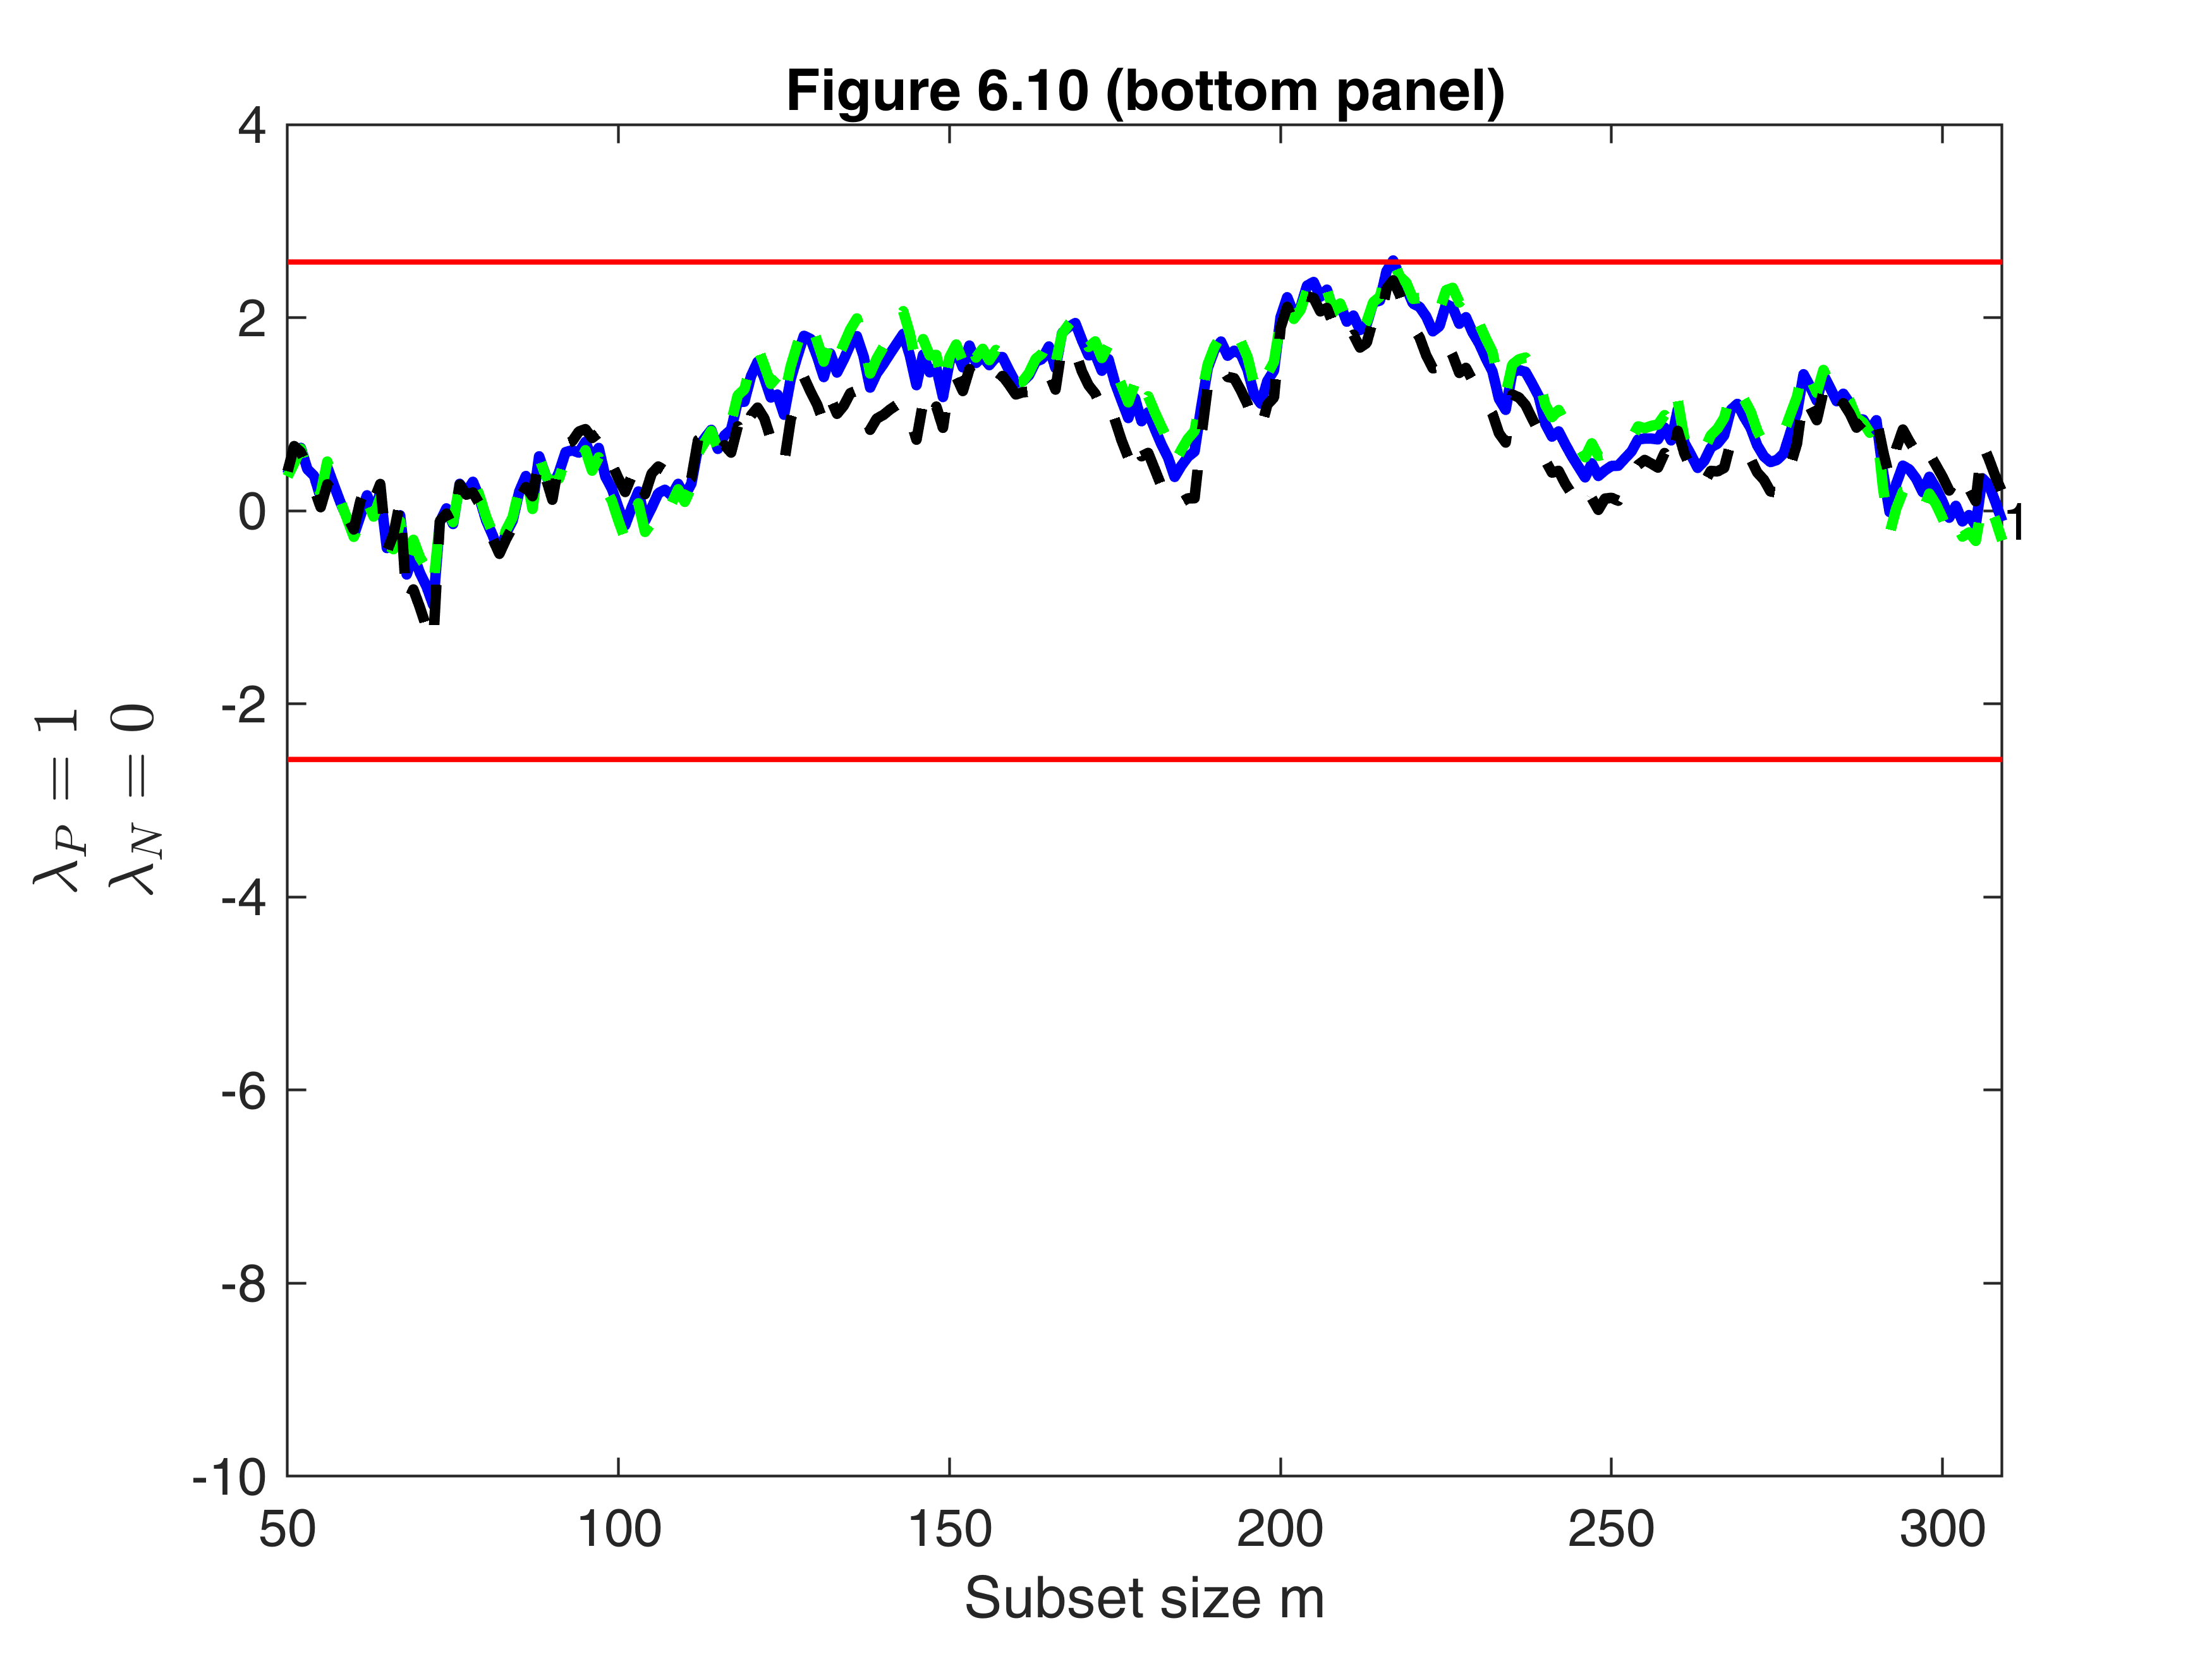

In [14]:
ylabel({' !!!EQ_1!!! ',' !!!EQ_6!!! '},'Interpreter','latex','FontSize',FontSizeylabel);
title('Figure 6.10 (bottom panel)')
set(gcf,"Name",'Figure 6.10 (bottom panel)')

In [15]:
% Store F and R2adj
% Store quantities for Table 6.1
mldlN0=fitlm(X,yBOT,'exclude','');
StoreFandR2lN0=[mldlN0.ModelFitVsNullModel.Fstat;  mldlN0.Rsquared.Adjusted];

if prin==1
    % print to postscript
    print -depsc figsFondi\fanplottra.eps;
end

## Create Figure 6.11

Scatterplot of the transformed data



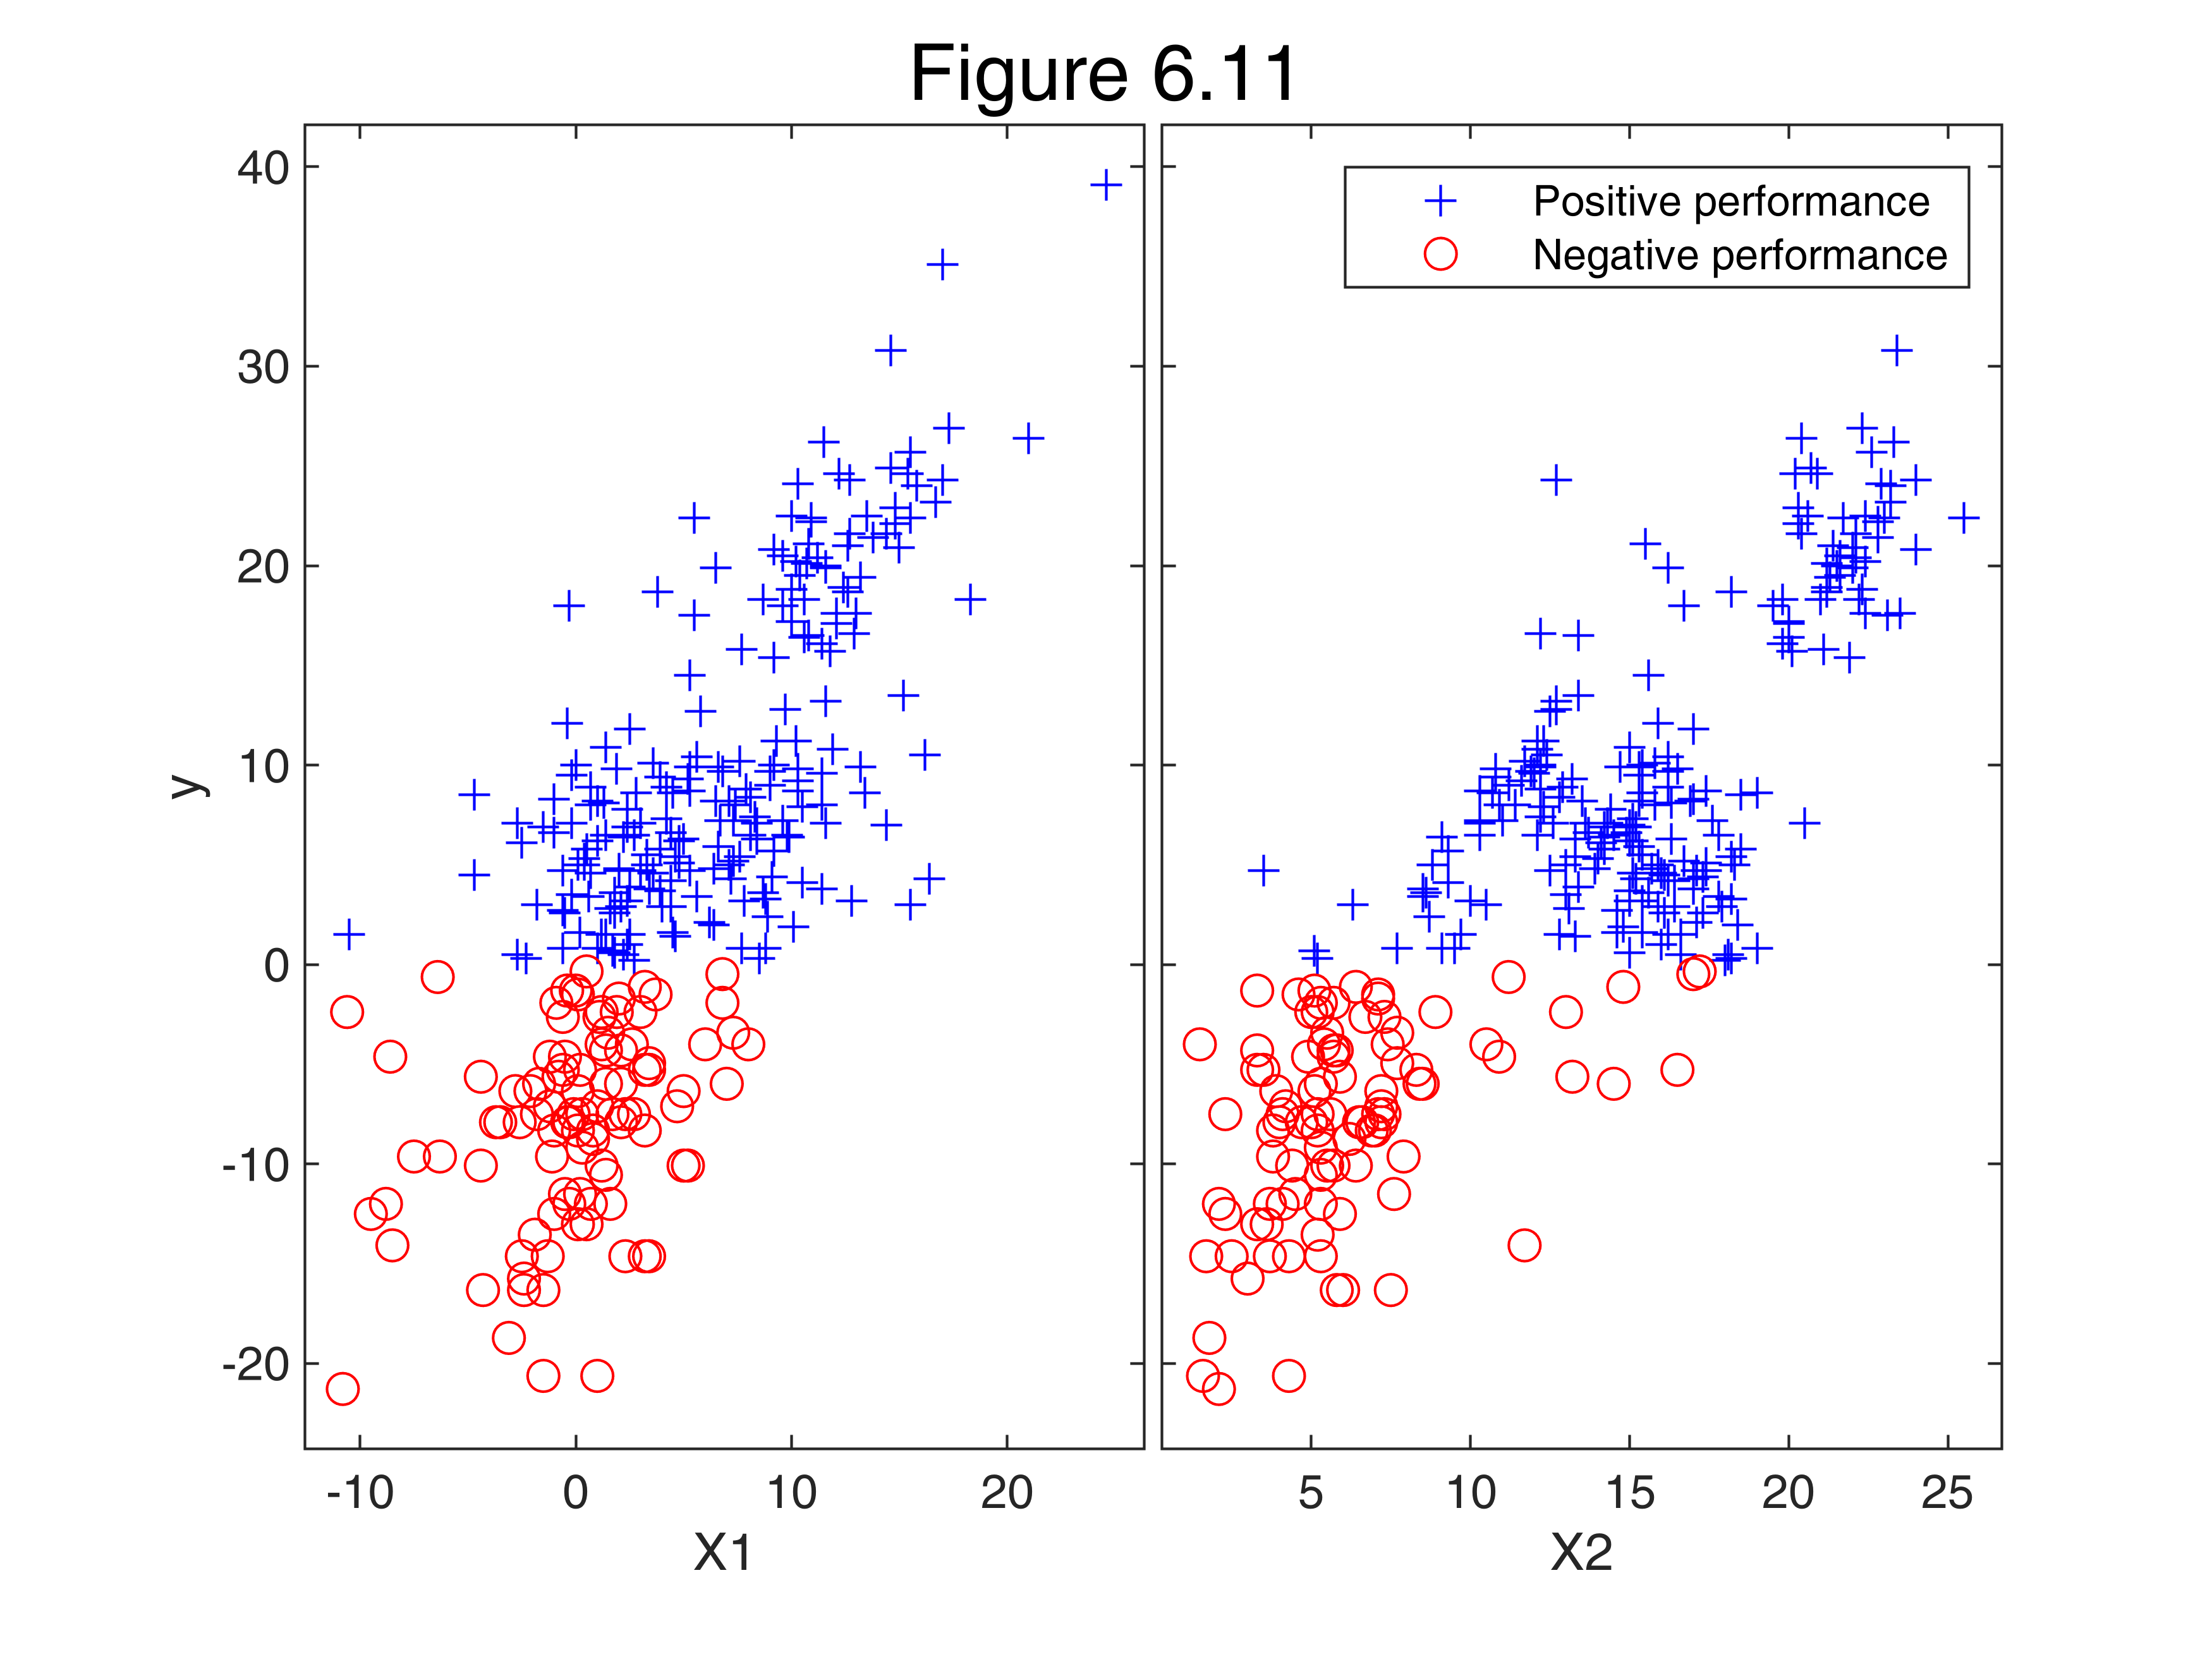

In [16]:
ymod=normYJpn(y, [], [1, 0], 'inverse',false, 'Jacobian', false);
seq=1:length(ymod);
group=ones(length(ymod),1);
group(seq(booneg))=2;

yXplot(ymod,X,'group',group);

legend({'Positive performance' 'Negative performance'})
sgtitle('Figure 6.11')
set(gcf,"Name",'Figure 6.11')

## Create Table 6.1

In [17]:
FandR2=[StoreFandR2lN1 StoreFandR2lN05 StoreFandR2lN025 StoreFandR2lN0];
nameRows=["F2,306" "R2adj"];
nameCols=["laP=1,laN=1" "laP=1,laN=0.5" "laP=1,laN=0.25" "laP=1,laN=0"];
FandR2t=array2table(FandR2,'RowNames',nameRows,'VariableNames',nameCols);
disp(FandR2t)

              laP=1,laN=1    laP=1,laN=0.5    laP=1,laN=0.25    laP=1,laN=0
              ___________    _____________    ______________    ___________
    F2,306      555.69           643.43           681.32           685.39  
    R2adj       0.7827          0.80664          0.81542          0.81631

In [18]:

%InsideREADME